# Exploratory Data Analysis

This notebook is dedicated to covering:
- Geographic data visualization
- Feature correlation analysis
- Feature engineering and creation
- Saving the final processed dataset (24 features) for model training

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Geographic Data Visualization
Visualize housing data from latitude and longitude to identify geographic trends.

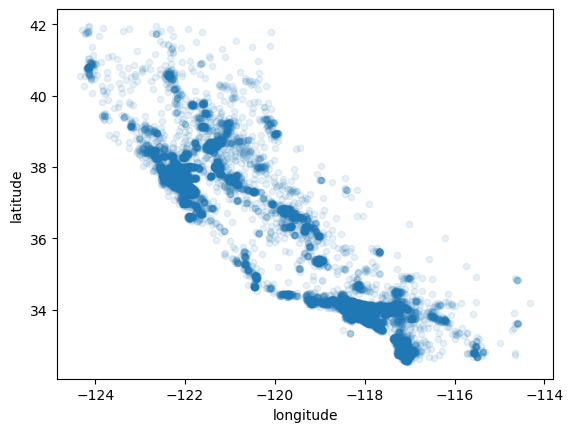

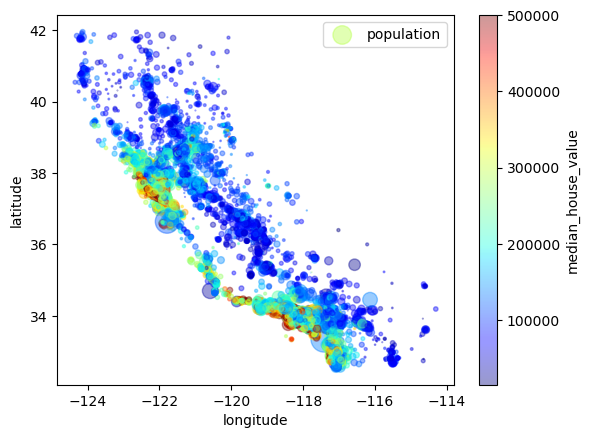

In [5]:
housing = pd.read_csv("~/CMSE492/HW/ca_housing_project/data/train/housing_train.csv")

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

# Add population and prices
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population",
             c="median_house_value", cmap="jet", colorbar=True)
plt.legend()
plt.show()

## Feature Correlation Analysis
Run a correlation matrix where we then analyze which features are correlated with the target variable median house value

In [6]:
# Run the corr method to see exatc values
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687013
income_cat            0.642624
total_rooms           0.134060
housing_median_age    0.104714
households            0.065798
total_bedrooms        0.049993
population           -0.025820
longitude            -0.043603
latitude             -0.146324
Name: median_house_value, dtype: float64

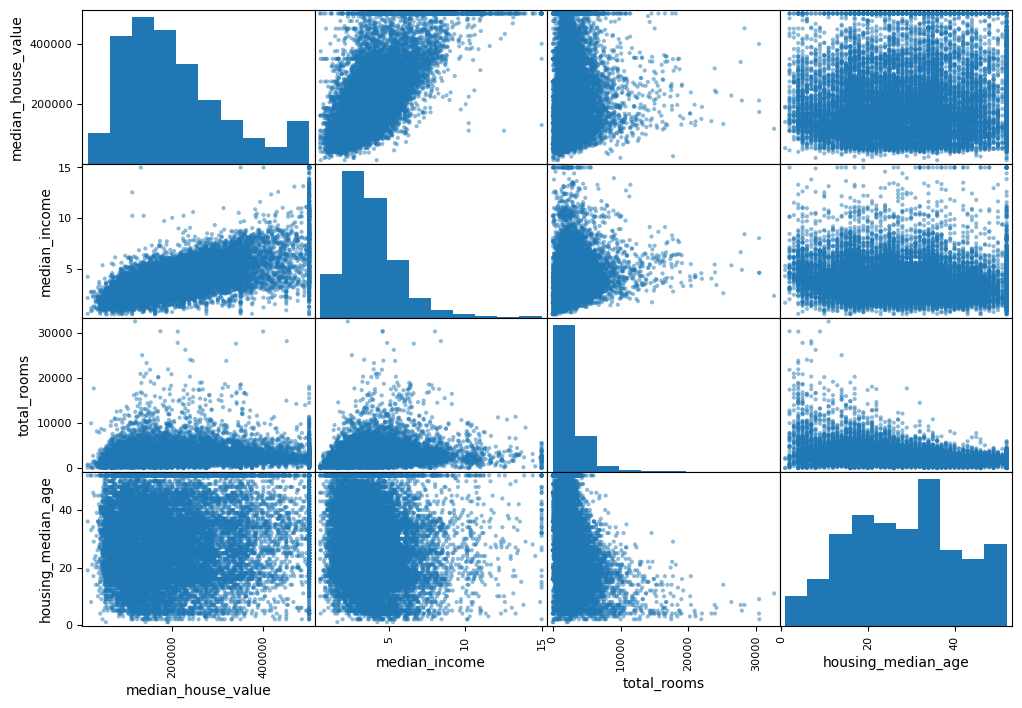

In [7]:
# Save attributes to a list
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
# Output plots to identify trends
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

## Feature Engineering and Creation
Create new attributes that capture useful relationships between existing features.

In [8]:
# Example featires pulled from text
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

# Verify
housing[["rooms_per_household", "bedrooms_per_room", "population_per_household"]].head()

,rooms_per_household,bedrooms_per_room,population_per_household
0,5.597948,0.185136,2.475746
1,5.395210,0.180910,4.179641
2,4.655660,0.224924,2.004043
3,6.186154,0.157672,3.350769
4,10.000000,0.191667,2.625000


## Save the Processed Dataset

The processed dataset w/ 24 features

In [10]:
housing.to_csv("~/CMSE492/HW/ca_housing_project/data/train/housing_train_processed.csv", index=False)